In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ydata_profiling as prf
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv("D:\Datasets\hotel_booking.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,07-09-2017,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [5]:
df.shape

(119390, 36)

## We do not need customer personal information so dropping column like credit_card,phone_number,email

In [6]:
df.drop(['credit_card','phone-number','email','name'],axis=1,inplace=True)

In [7]:
df.shape

(119390, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## reservation_status_date is of object type , we need to change it to datetime

In [10]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [12]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("---"*30)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SY

## company and agent column has been dropped as it has large number of null values

In [13]:
df.drop(['company','agent'],axis=1,inplace=True)
df.dropna(inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
## In adr column many outlliers are present 

In [18]:
outlier_left=70-1.5*(126-70)
outlier_right=126+1.5*(126+70)
outlier_right

420.0

In [19]:
df=df[df['adr']<420]

In [20]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000,118891.000000
mean,0.371349,104.312656,2016.157640,27.166396,15.801011,0.928876,2.502090,1.858391,0.104163,0.007948,0.032004,0.087147,0.131633,0.221169,2.330891,101.940423,0.061880,0.571666
std,0.483167,106.902159,0.707455,13.590061,8.780196,0.996185,1.900047,0.578586,0.399070,0.097383,0.176012,0.845894,1.484713,0.652791,17.630962,48.023092,0.244164,0.792619
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,402.000000,8.000000,5.000000


## Data analysis and visualisation

In [21]:
cancelled_per=(((df['is_canceled']).value_counts())/len(df))*100

In [22]:
cancelled_per

0    62.865145
1    37.134855
Name: is_canceled, dtype: float64

Text(0, 0.5, 'Reservation counts')

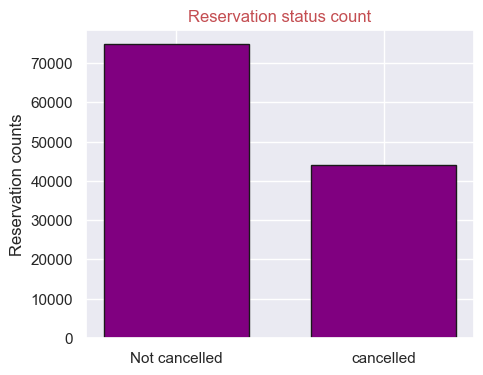

In [23]:
plt.figure(figsize=(5,4))
plt.title("Reservation status count",color='r')
plt.bar(['Not cancelled','cancelled'],df.is_canceled.value_counts(),width=0.7,edgecolor="k",color="purple")
plt.ylabel("Reservation counts")

### The above graph shows that 37 percent of reservation has been cancelled which is significant number
### although 63 percent has not been cancelled.

Text(0, 0.5, 'Number of reservations')

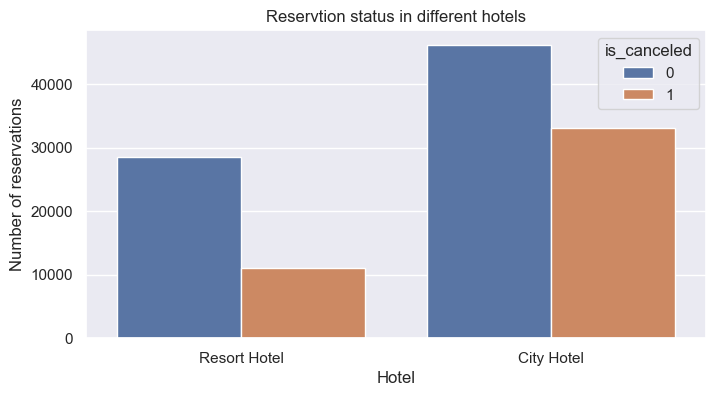

In [24]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title("Reservtion status in different hotels")
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')

### In comparison to resort hotels , city hotels have more booking reason might be resort hotels are more expensive.
### city hotels have more cancellation rates than resort hotel

## Chceking reservation status in resort hotel

In [25]:
resort_hotel=df[df['hotel']=='Resort Hotel']
(resort_hotel['is_canceled'].value_counts()/len(resort_hotel))*100



0    72.027177
1    27.972823
Name: is_canceled, dtype: float64

## chceking reservation status in city hotel

In [26]:
city_hotel=df[df['hotel']=="City Hotel"]
(city_hotel['is_canceled'].value_counts()/len(city_hotel))*100

0    58.290773
1    41.709227
Name: is_canceled, dtype: float64

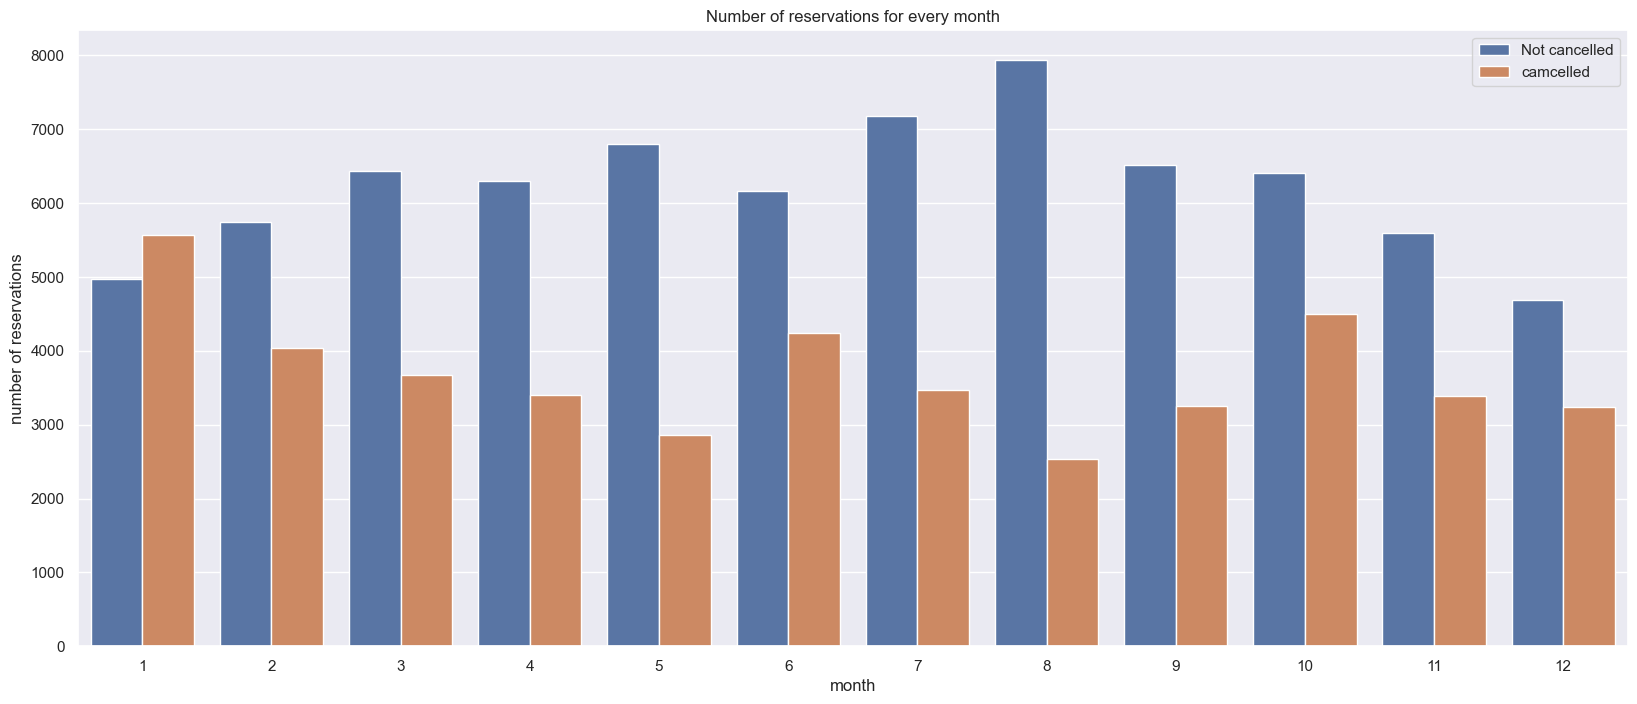

In [27]:
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20,8))
sns.countplot(x='month',hue="is_canceled",data=df)
plt.title("Number of reservations for every month")
plt.ylabel('number of reservations')
plt.legend(["Not cancelled","camcelled"])
plt.show()

### The above graph shows reservations and cancellation month wise. It can be seen that both the number of reservations is largest in the month of august whereas january with most cancelled reservations.

In [28]:
p=df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index()
p

,month,adr
0,1,532660.54
1,2,399081.98
2,3,418882.79
3,4,399361.20
4,5,343229.69
5,6,468827.36
6,7,387147.85
7,8,296665.40
8,9,340233.39
9,10,384742.47


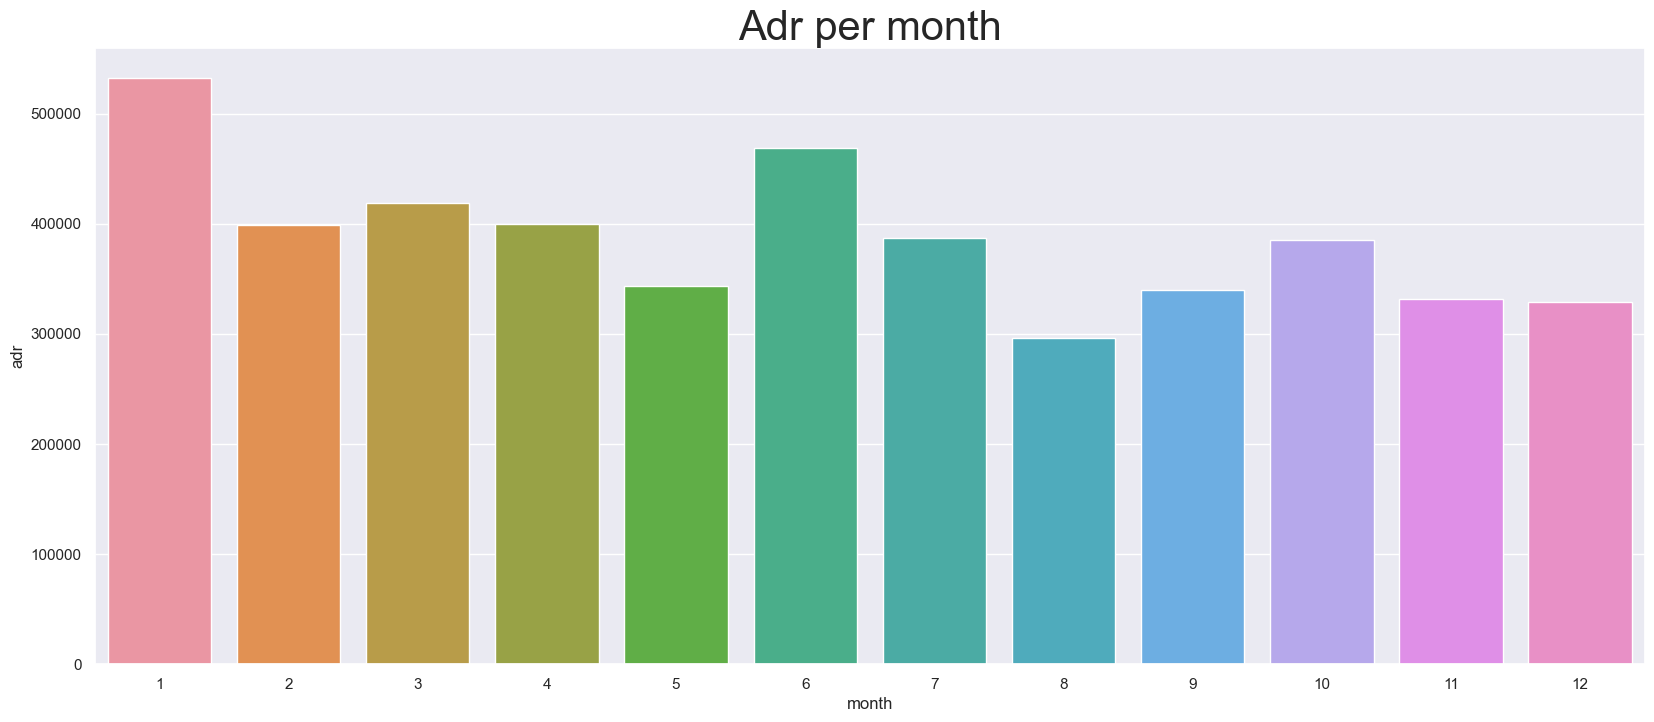

In [29]:
plt.figure(figsize=(20,8))
plt.title("Adr per month",fontsize=30)
sns.barplot(x='month',y="adr",data=p)
plt.show()

### The above graph demonstrate cancellations are most common when price is higher and less cancellations when price is lower. Incease in price can be reason of high cancellations.

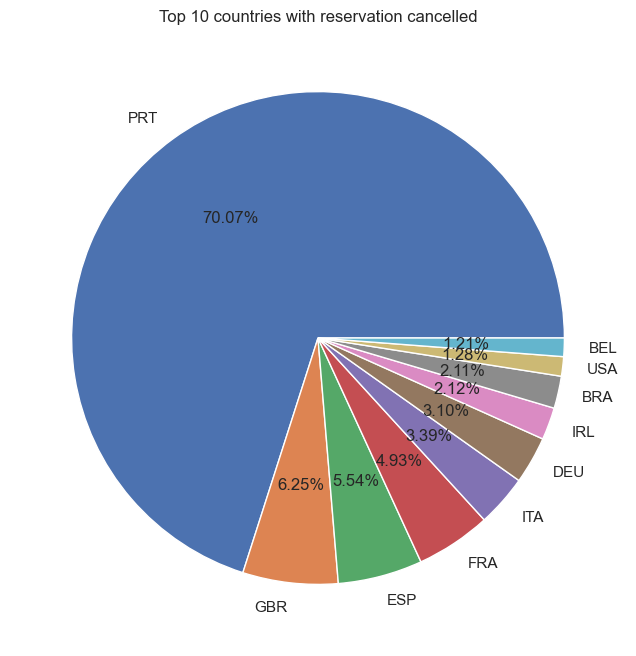

In [30]:
cancelled_data=df[df['is_canceled']==1]
top_10_country=cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title("Top 10 countries with reservation cancelled")
plt.pie(top_10_country,autopct='%.2f%%',labels=top_10_country.index)
plt.show()

### The above graph shows top 10 countries with highest cancellation rates. It can be seen that highest cancellations happened in Portugal(prt)

In [31]:
df['market_segment'].value_counts()

Online TA        56401
Offline TA/TO    24158
Groups           19806
Direct           12445
Corporate         5110
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [32]:
top_5_market_segment=df['market_segment'].value_counts(normalize=True)[:5]*100
top_5_market_segment

Online TA        47.439251
Offline TA/TO    20.319452
Groups           16.658957
Direct           10.467571
Corporate         4.298055
Name: market_segment, dtype: float64

In [33]:
cancel_in_top_5_segment=cancelled_data['market_segment'].value_counts(normalize=True)[:5]*100
cancel_in_top_5_segment

Online TA        46.969422
Groups           27.399773
Offline TA/TO    18.747452
Direct            4.346546
Corporate         2.215176
Name: market_segment, dtype: float64

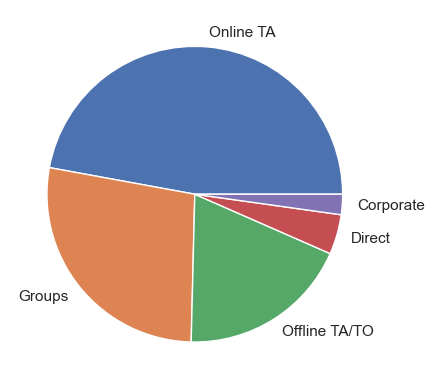

In [34]:
plt.pie(cancel_in_top_5_segment,labels=cancel_in_top_5_segment.index)
plt.show()

### It can be seen that most cancelaltions happened when reservations are booked through online

# Suggestions

1. Cancellation rates rise as the price does. 
In order to prevent cancellation of reservations, hotel could work on 
their pricing strategies and try to lower the rates for 
specific hotels based on locations.They can also provide some discounts to customers.
       

2. As the ratio of cancellation and non cancellation of the resort hotel is higher in the resort hotel 
than in the city hotels.So the hotels should provide a reasonable discounts on the room prices on 
weekends and on holidays.

3. In the moth of January , hotels can start campaigns or marketing with a reasonable amount to increase 
their revenue as the cancellation is the highest in this month.

4. They can also increase the quality of their hotels and their services mainly in Portugal 
to reduce the cancellation rate.